<center>

![Stock Image](https://i.imgur.com/2YhxhEm.jpeg)

</center>

---

# <left>**Graded Challenge 7 : Rock Paper Scissors Hand Signs Prediction**</left>       <a style="float:right; margin-bottom: 55px; margin-right: 15px"><img src="https://cdn-icons-png.flaticon.com/512/4144/4144533.png" alt="drawing" width="64" align="center"/></a>

---

# **Table Of Contents**



1. [**Introduction**](#class1)
    * [*Objective*](#class1a)
    * [*Dataset Information*](#class1b)
2. [**Import Libraries**](#class2)
3. [**Data Loading**](#class3)
4. [**Exploratory Data Analysis**](#class4)
5. [**Feature Engineering**](#class5)
6. [**ANN Training (Sequential API / Functional API)**](#class6)
    * [*Model Definition*](#class6a)
    * [*Model Training*](#class6b)
    * [*Model Evaluation*](#class6c)
7. [**ANN Improvement (Sequential API / Functional API)**](#class7)
    * [*Model Definition*](#class7a)
    * [*Model Training*](#class7b)
    * [*Model Evaluation*](#class7c)
8. [**Model Saving**](#class8)
9. [**Model Inference**](#class9)
10. [**Conclusion**](#class10)

---

# <a id="class1" style="">**1. Introduction**</a> <a style="float:right; margin-right: 15px"><img src="https://png.pngtree.com/png-vector/20221010/ourmid/pngtree-paper-icon-png-image_6294297.png" alt="drawing" width="64" align="center"/></a>

---

**Name :** Michael Parsaoran   
**Batch :** HCK-016   

## <a id="class1a">*Objective*</a>

The goal of this project is to construct a Convolutional Neural Network (CNN) model that predicts hand signs when playing rock paper scissors. We'll explore the images within the data using Convolutional Neural Network. Each model will be carefully evaluated by looking at their performance graph and metrics such as F1 score. After trying the first model, we'll fine-tune its neural network to improve its accuracy too. Finally, we'll compare the tuned model with the base one to choose the best option for predicting hand signs accurately and reliably.

## <a id="class1b">*Dataset Information*</a>

 This project utilizes a raw dataset sourced from kaggle.com titled *"Rock-Paper-Scissors Images"* shared by DrgFreeman. The dataset comprises images captured by himself as a part of his hobby. Below, you'll find a detailed description the dataset. For access to the dataset source, you can click [here!](https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors)

---

# <a id="class2">**2. Import Libraries**</a> <a style="float:right; margin-right: 15px"><img src="https://cdn-icons-png.flaticon.com/512/4911/4911643.png" alt="drawing" width="64" align="center"/></a>

---

In [4]:
!pip install rembg tensorflow opencv-python numpy matplotlib pathlib pillow glob2 rembg

  Preparing metadata (setup.py) ... done
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 81.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.3 MB/s eta 0:00:00
  Created wheel for glob2: filename=glob2-0.7-py2.py3-none-any.whl size=9300 sha256=8c9f4a1ff0d12609dbbff7fa3370c5a55a5ce7da7a400a45132b812283777084
  Stored in directory: /root/.cache/pip/wheels/37/07/ce/cbe8d31ad93224571b49fa03f8a5da11cdb31d3845ff73e0f3
Successfully built glob2
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that a

In [253]:
!pip install visualkeras

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 30.9 MB/s eta 0:00:00


In [259]:
# Importing Libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import os
from pathlib import Path
import random
import seaborn as sns

# Feature Engineering
from rembg import remove
from PIL import Image
from glob import glob
from cv2 import imread, imwrite
from sklearn.model_selection import train_test_split

# Modelling
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.utils import load_img, img_to_array, array_to_img
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import Model, models, Input

from cv2 import Canny, inRange, cvtColor, COLOR_BGR2RGB, COLOR_BGR2GRAY

from tqdm import tqdm
import visualkeras as vk

**Import Libraries - Explanation**

Before we commence the project, we `import all the necessary libraries required to facilitate various tasks throughout the project`. Each library serves as a tool for specific purposes as indicated by the comments provided above the code. These libraries provide functionalities ranging from data manipulation, visualization, and model building, etc., enabling us to efficiently conduct data analysis and develop machine learning models for our project.

---

# <a id="class3">**3. Data Loading**</a> <a style="float:right; margin-right: 15px"><img src="https://icons.veryicon.com/png/128/business/commercial-plain-blue-collection/wd-accent-data-clock.png" alt="drawing" width="64" align="center"/></a>

---

**Explanation**

To begin analyzing a dataset of images featuring hands playing rock-paper-scissors, we'll load the dataset into our Jupyter notebook. This dataset includes various images representing the hand gestures for rock, paper, and scissors. By importing and processing this data, we aim to build a model that can recognize and classify these hand gestures, enabling us to develop applications that can accurately interpret the game of rock-paper-scissors through image recognition.

In [58]:
directory = "/kaggle/input/rockpaperscissors"
new_dir = "/kaggle/working/rps-rembg"
can_dir = "/kaggle/working/rps-canny"
labels = ['rock', 'paper', 'scissors']

input = "/kaggle/input"
output = "/kaggle/working"

In [16]:
import os
for dirname, _, filenames in os.walk(directory):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break
    break

/kaggle/input/rockpaperscissors/README_rpc-cv-images.txt


In [17]:
# Checking list of folders and file in directory
print(os.listdir(directory))
nb = len(labels)

['paper', 'rock', 'rps-cv-images', 'README_rpc-cv-images.txt', 'scissors']


In [18]:
def input_target_split(train_dir,labels):
    dataset = []
    count = 0
    for label in labels:
        folder = os.path.join(train_dir,label)
        for image in os.listdir(folder):
            img=load_img(os.path.join(folder,image), target_size=(150,150))
            img=img_to_array(img)
            img=img/255.0                       # Normalization
            dataset.append((img,count))
        print(f'\rCompleted: {label}',end='')
        count+=1
    random.shuffle(dataset)
    X, y = zip(*dataset)
    
    return np.array(X),np.array(y)

**Explanation**



In [19]:
X, y = input_target_split(directory,labels)

Completed: scissors

---

# <a id="class4">**4. Exploratory Data Analysis (EDA)**</a> <a style="float:right; margin-right: 15px"><img src="https://cdn-icons-png.flaticon.com/512/272/272369.png" alt="drawing" width="64" align="center"/></a>

---

In [20]:
def createPie(dir, labels):
    lab = [word.capitalize() for word in labels] # Capitalize every label (e.g. scissors -> Scissors)
    imgs = []
    for label in labels:
        imgdir = os.path.join(dir, label)
        imgs.append(len(os.listdir(imgdir))) # Append size of each hand sign to imgs
    
    
    
    # Creating piechart
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))

    axs[0].bar(lab, imgs, color=['red', 'darkblue', 'darkgreen'])
    axs[0].set_title('Bar Plot of Images Amount for Each Hand Sign')
    axs[0].set_xlabel('Hand Sign Class')
    axs[0].set_ylabel('Amount')
    axs[0].grid(axis='y', linestyle='--', alpha=1)  

    axs[1].set_title("Pie Chart of Images Amount for Each Hand Sign")
    axs[1].pie(imgs, labels=lab, autopct='%1.1f%%',  colors = ['red', 'darkblue', 'darkgreen'])
    
    plt.show()

**Explanation**

The code above is a function for creating pie chart, showing the distribution of the image set for each class. By using this function, we insert the directory and labels for each class (for this instance is `rock`, `paper` and `scissors`)

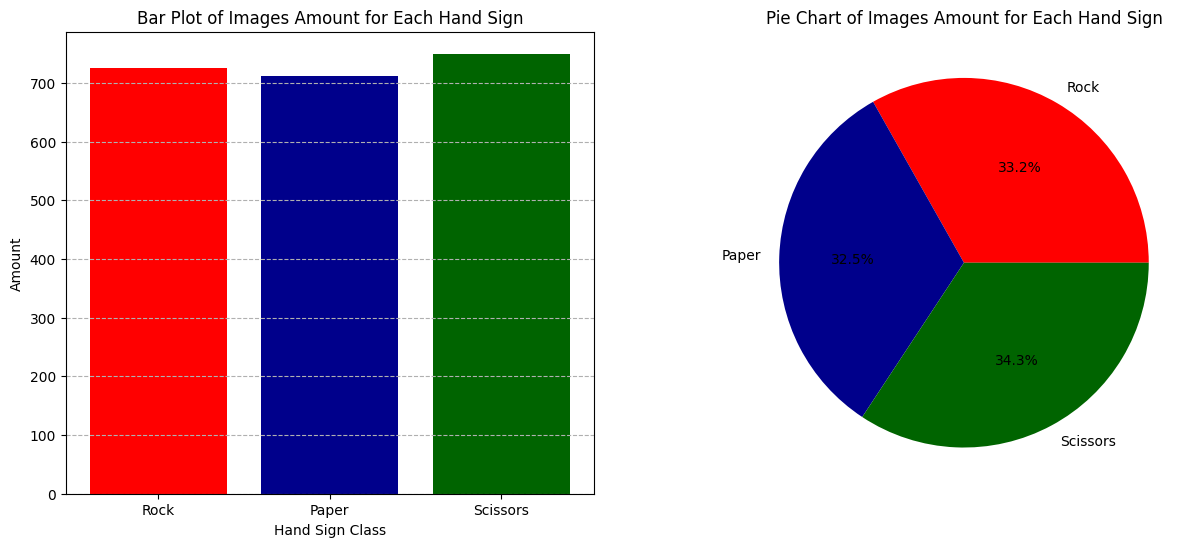

In [21]:
createPie(directory, labels)

# lab, imgs = createPie(directory, labels)

# df = pd.DataFrame(lab, imgs)
# plt.figure(figsize=(8,8))
# plt.pie(df, labels=['Paper', 'Scissors', 'Rock'])
# # plt.figure(figsize=(8,8))
# # plt.pie(pie.value_counts(), labels=['Paper', 'Scissors', 'Rock'], autopct='%1.1f%%')

**Explanation**

From this chart, we can observe that the images are fairly evenly distributed among the three categories, with Scissors having the highest proportion of images and Paper having the least, though the differences are relatively small. This suggests that there is a balanced dataset with a slight preference towards Scissors.

In [185]:
# Function to rename our label from numeric to categorical

def renameLabel(label):
    conds = [
        label == 0,
        label == 1,
        label == 2
    ]
    
    choice = [
        'Rock',
        'Paper',
        'Scissors'
    ]
    
    return np.select(conds, choice)

In [188]:
# Display 16 picture of the dataset with their labels
def show_randIMG(arr, label, rows=4, cols=4, size=(10,10)):
    rand = np.random.randint(0, len(y), 16)
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                            subplot_kw={'xticks': [], 'yticks': []})
    n = 1
    for i, ax in enumerate(axes.flat):
        ax.imshow(arr[rand[i]])
        ax.set_title(renameLabel(label[rand[i]]))
    plt.tight_layout()
    plt.show()

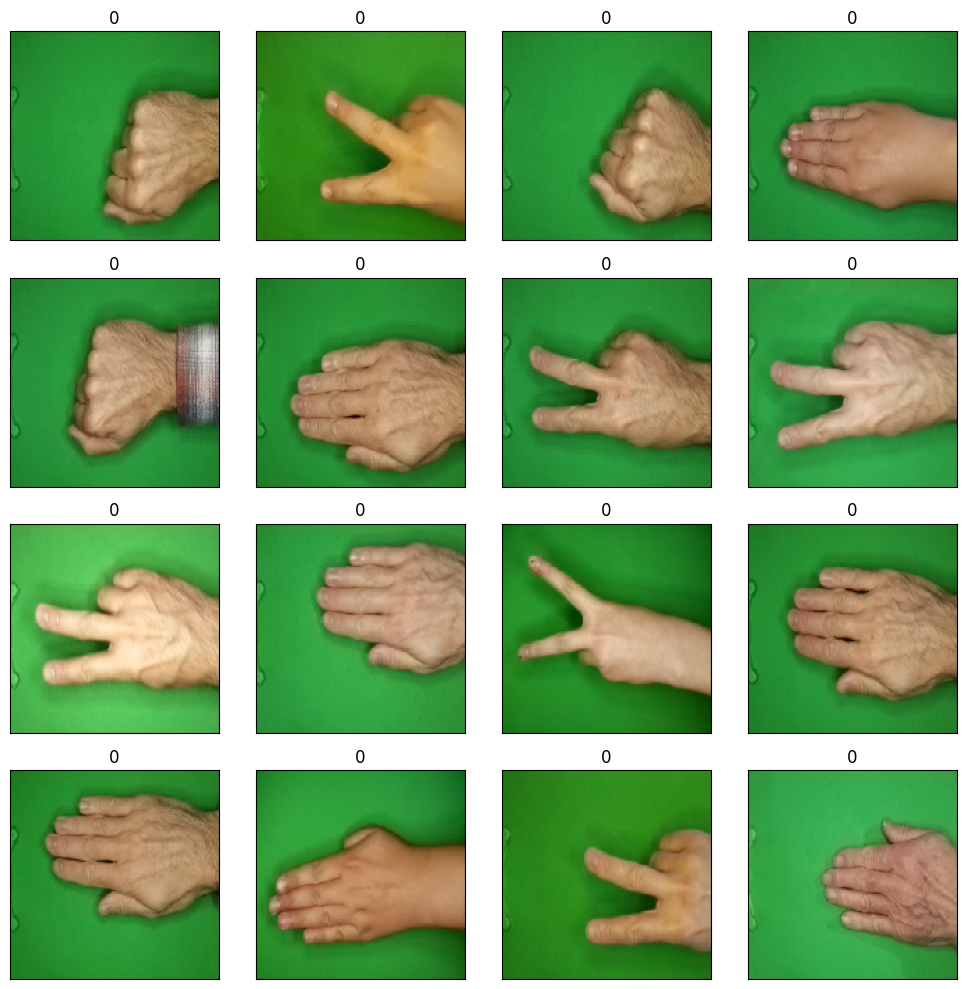

In [189]:
show_randIMG(X, y)

**Explanation**

This code generates a plot showing random images from the dataset. Above the pictures generated we can see the label for each images. Although the image's dimension is 300 x 200 pixels, we can see that the ratio for each image is 1:1, indicating that the images were squeezed from it's original size.

---

# <a id="class5">**5. Feature Engineering**</a> <a style="float:right; margin-right: 15px"><img src="https://cdn-icons-png.flaticon.com/256/2861/2861721.png" alt="drawing" width="64" align="center"/></a>

---

In [25]:
def createDir(dir, path: list):
    '''
    This command is used to create a new directory to store the image
    after we remove the background, and then save it in .png
    '''
    if not os.path.exists(dir):
        os.mkdir(dir)
        print(f'Directory {dir} created')
    else:
        print(f"Directory {dir} already exists")
    
    for n in range(len(path)):
        np = os.path.join(dir, path[n])
        if not os.path.exists(np):
            os.mkdir(np)
            print(f'Directory {np} created')
        else:
            print(f"Directory {np} already exists")

In [26]:
createDir(new_dir, labels)

Directory /kaggle/working/rps-rembg created
Directory /kaggle/working/rps-rembg/rock created
Directory /kaggle/working/rps-rembg/paper created
Directory /kaggle/working/rps-rembg/scissors created


**createDir() - Explanation**

The main usage of the function `createDir()` is to create a new directory that mimicks the original image dataset folders and directory, to store images with its background removed by using `remGen()` which i will explain later.

In [27]:
def rembGen(dir, tdir, path):
    
    '''
    This function is used to remove the background of each picture
    and save all of them to a new folder.
    '''
    if os.path.isdir(dir):
        for n in range((len(path))):
            print(f"Selecting {path[n]}")
            s_path = os.path.join(dir, path[n])
            t_path = os.path.join(tdir, path[n])
            
            if os.path.isdir(s_path) and os.path.isdir(t_path):
                i = 1 
                for file in tqdm(Path(s_path).glob("*.png")):
                    # rand = int(str(np.random.rand(1).tolist()[0]).split(".")[1])          
                    filename = f"{path[n]}_{i}.png"
                    # print(filename)
                    img = Image.open(file)
                    output = remove(img)
                    output.save(os.path.join(t_path, filename), "PNG")
#                     print(f"{i} | File {filename} saved in {t_path}")
                    
                    
                    i+=1
            else:
                return "Path not found"
    else:
        return "Directory not found"

In [28]:
rembGen(directory, new_dir, labels)

Selecting rock


0it [00:00, ?it/s]Downloading data from 'https://github.com/danielgatis/rembg/releases/download/v0.0.0/u2net.onnx' to file '/root/.u2net/u2net.onnx'.

  0%|                                               | 0.00/176M [00:00<?, ?B/s]
  2%|▊                                     | 3.93M/176M [00:00<00:04, 39.3MB/s]
  5%|█▊                                    | 8.30M/176M [00:00<00:04, 41.9MB/s]
  7%|██▋                                   | 12.7M/176M [00:00<00:03, 42.9MB/s]
 10%|███▋                                  | 17.0M/176M [00:00<00:03, 42.8MB/s]
 12%|████▌                                 | 21.3M/176M [00:00<00:03, 42.0MB/s]
 14%|█████▌                                | 25.5M/176M [00:00<00:03, 42.0MB/s]
 17%|██████▍                               | 29.8M/176M [00:00<00:03, 42.4MB/s]
 19%|███████▍                              | 34.2M/176M [00:00<00:03, 43.0MB/s]
 22%|████████▎                             | 38.6M/176M [00:00<00:03, 43.3MB/s]
 24%|█████████▎                            | 43.0

Selecting paper


712it [18:05,  1.52s/it]


Selecting scissors


750it [19:12,  1.54s/it]


**rembGen() - Explanation**

The function `rembGen()` is used to remove the background from each image in the dataset by using rembg, a python package that utilizes U-Net, a neural network architecture developed by Olaf Ronneberger for biomedical image segmentation. By using this function we can transform all images in our dataset to a completely new folder that we made in `createDir()` before.

In [192]:
X_rem, y_rem = input_target_split(new_dir, labels)

Completed: scissors

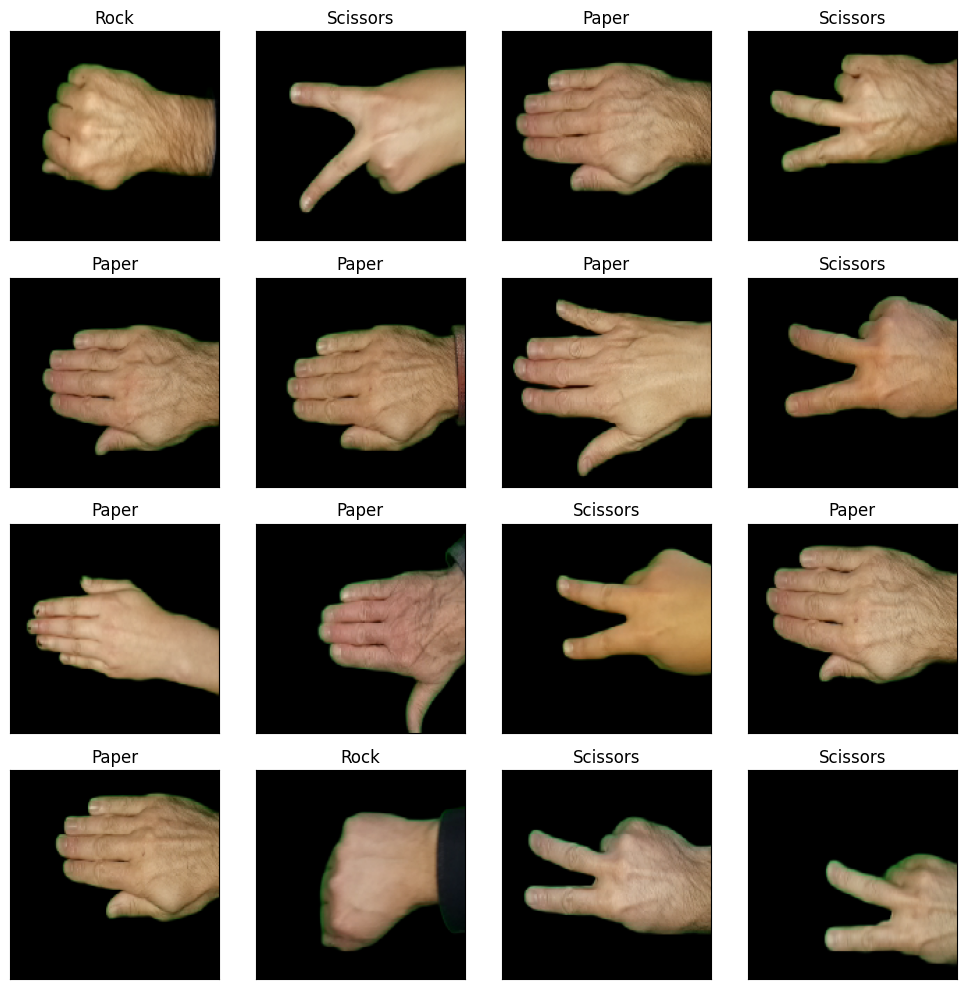

In [193]:
show_randIMG(X_rem, y_rem)

In [47]:
def edgingIMG(X: np.ndarray, y: np.ndarray):
    new_X = np.ndarray()
    for img in X:
        new_img = array_to_img(img)
        output = Canny(new_img, threshold1=50, threshold2=80)
        
    

In [105]:
def CannyE(dir, tdir, path):
    
    '''
    This function is used to remove the background of each picture
    and save all of them to a new folder.
    '''
    if os.path.isdir(dir):
        for n in range((len(path))):
            print(f"Selecting {path[n]}")
            s_path = os.path.join(dir, path[n])
            t_path = os.path.join(tdir, path[n])
            
            if os.path.isdir(s_path) and os.path.isdir(t_path):
                i = 1 
                for file in tqdm(Path(s_path).glob("*.png")):
                    # rand = int(str(np.random.rand(1).tolist()[0]).split(".")[1])          
#                     print("test")
                    filename = f"{path[n]}_{i}.png"
#                     # print(filename)
                    img = load_img(file)
                    img = img_to_array(img)
                    img = np.uint8(img)
                    img = Canny(img, 100, 200)
                    
                    output = Image.fromarray(img, 'L')
                    output.save(os.path.join(t_path, filename), "PNG")
#                     print(f"{i} | File {filename} saved in {t_path}")
                    
                    
                    i+=1
            else:
                return "Path not found"
    else:
        return "Directory not found"

In [106]:
createDir(os.path.join(output, 'rps-canny'), labels)

Directory /kaggle/working/rps-canny already exists
Directory /kaggle/working/rps-canny/rock already exists
Directory /kaggle/working/rps-canny/paper already exists
Directory /kaggle/working/rps-canny/scissors already exists


In [107]:
CannyE(new_dir, can_dir, labels)

Selecting rock


726it [00:03, 214.39it/s]


Selecting paper


712it [00:03, 216.76it/s]


Selecting scissors


750it [00:03, 234.74it/s]


In [229]:
X_can, y_can = input_target_split(can_dir, labels)

Completed: scissors

Scissors


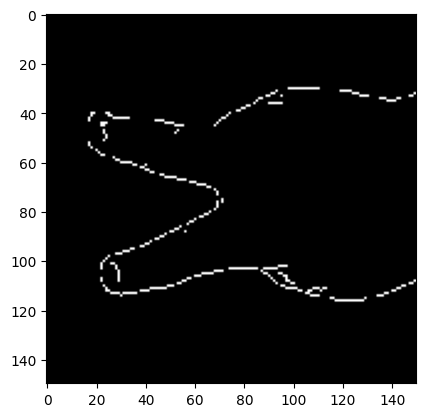

In [154]:
y_can = renameLabel(y_can)
plt.imshow(X_train[4])
print(y_train[4])

## Train Test Split

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X_can, 
                                                    y_can, 
                                                    random_state = 42, 
                                                    test_size = 0.35)

X_val, X_test, y_val, y_test = train_test_split(X_test, 
                                                y_test, 
                                                random_state = 42, 
                                                test_size = 0.5)

---

# <a id="class6">**6. ANN Training (Sequential API)**</a> <a style="float:right; margin-right: 15px"><img src="https://cdn-icons-png.freepik.com/512/2103/2103633.png" alt="drawing" width="64" align="center"/></a>

---

## <a id="class6a">a. *Model Definition*</a>

In [270]:
def randseed(seed=20):
    seed = seed
    tf.keras.backend.clear_session()
    np.random.seed(seed)
    tf.random.set_seed(seed)

randseed()

In [271]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (5,5), activation=tf.nn.relu,input_shape=(150, 150, 3)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu,padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu,padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 64)      4864      
                                                                 
 batch_normalization (Batch  (None, 146, 146, 64)      256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 73, 73, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 128)       0

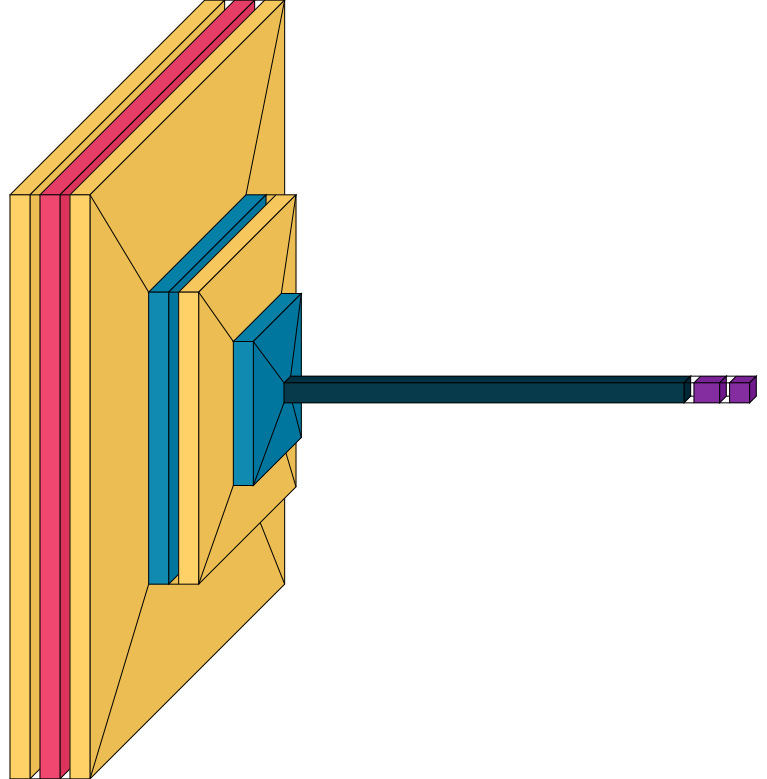

In [272]:
vk.layered_view(model)

**Explanation**

The neural network architecture shown above is used by most CNN model. As we can see in the visualization, the model process the image to smaller chunk and finally predict the label.

In [273]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') >= 9.9e-1:
            self.model.stop_training = True
            
callbacks = CustomCallback()

In [275]:
from tensorflow.python.keras.engine import data_adapter

def _is_distributed_dataset(ds):
    return isinstance(ds, data_adapter.input_lib.DistributedDatasetSpec)

data_adapter._is_distributed_dataset = _is_distributed_dataset

## <a id="class6b">b. *Model Training*</a>

In [289]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer= 'Adam', metrics=['accuracy'])

histseq = model.fit(X_train, 
                    y_train,
                    epochs = 25,
                    verbose = 1,
                   callbacks=[callbacks], 
                   validation_data = (X_val, y_val))

Epoch 1/25
45/45 [==============================] - 4s 63ms/step - loss: 11.8924 - accuracy: 0.7257 - val_loss: 23.3164 - val_accuracy: 0.3655
Epoch 2/25
45/45 [==============================] - 2s 53ms/step - loss: 0.7957 - accuracy: 0.8987 - val_loss: 11.2779 - val_accuracy: 0.4256
Epoch 3/25
45/45 [==============================] - 2s 53ms/step - loss: 0.1496 - accuracy: 0.9501 - val_loss: 5.7764 - val_accuracy: 0.4595
Epoch 4/25
45/45 [==============================] - 2s 53ms/step - loss: 0.0594 - accuracy: 0.9782 - val_loss: 2.8442 - val_accuracy: 0.4569
Epoch 5/25
45/45 [==============================] - 2s 54ms/step - loss: 0.0330 - accuracy: 0.9887 - val_loss: 1.0659 - val_accuracy: 0.5979
Epoch 6/25
45/45 [==============================] - 2s 53ms/step - loss: 0.0200 - accuracy: 0.9930 - val_loss: 0.7327 - val_accuracy: 0.6867


## <a id="class6c">c. *Model Evaluation*</a>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

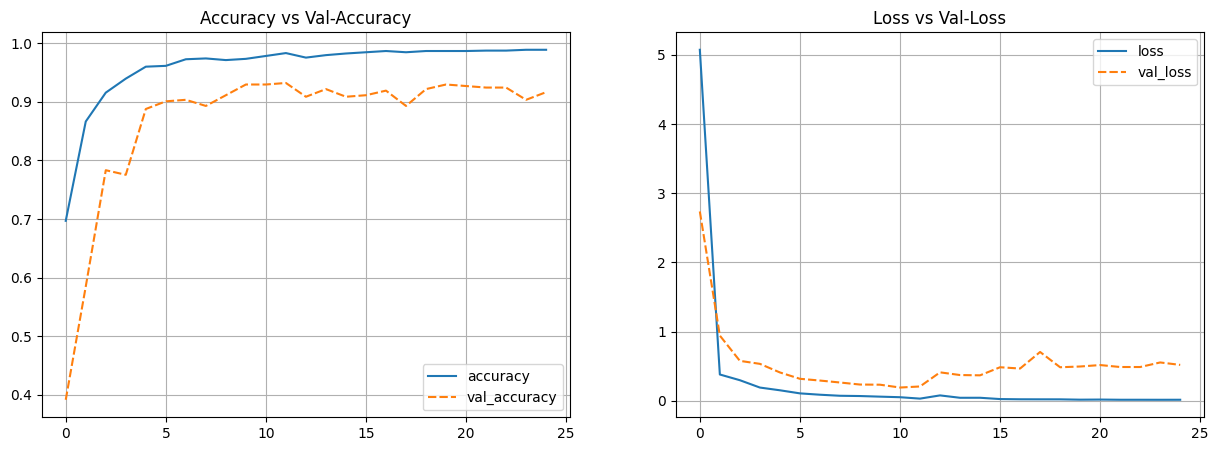

In [252]:
history_model_1 = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_model_1[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_model_1[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

**Explanation**

- The model shows noticable overfitting, though the accuracy and loss is quite impressive.
- The loss as we can see decrease sharply from 5 in first epoch, down to ~0.5 on the second epoch.
- The rapid decrease in both training and validation loss indicates effective learning initially.

---

# <a id="class7">**7. ANN Improvement (Sequential API / Functional API)**</a> <a style="float:right; margin-right: 15px"><img src="https://cdn-icons-png.flaticon.com/512/7747/7747363.png" alt="drawing" width="64" align="center"/></a>

---

## <a id="class7a">a. *Model Definition*</a>

In [284]:
input_shape = (150,150,3)

inputs = Input(shape = input_shape)

x = Conv2D(32, (3,3), activation = 'relu')(inputs)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.5)(x)


for num in [64,128,256]:
    x = Conv2D(num, (3,3), activation = 'relu')(x)
    x = MaxPooling2D((2,2))(x)
    
x = Flatten()(x)
x = Dense(512, activation = 'relu')(x)
output = Dense(3, activation = 'softmax')(x)

mod_func = Model(inputs, output)

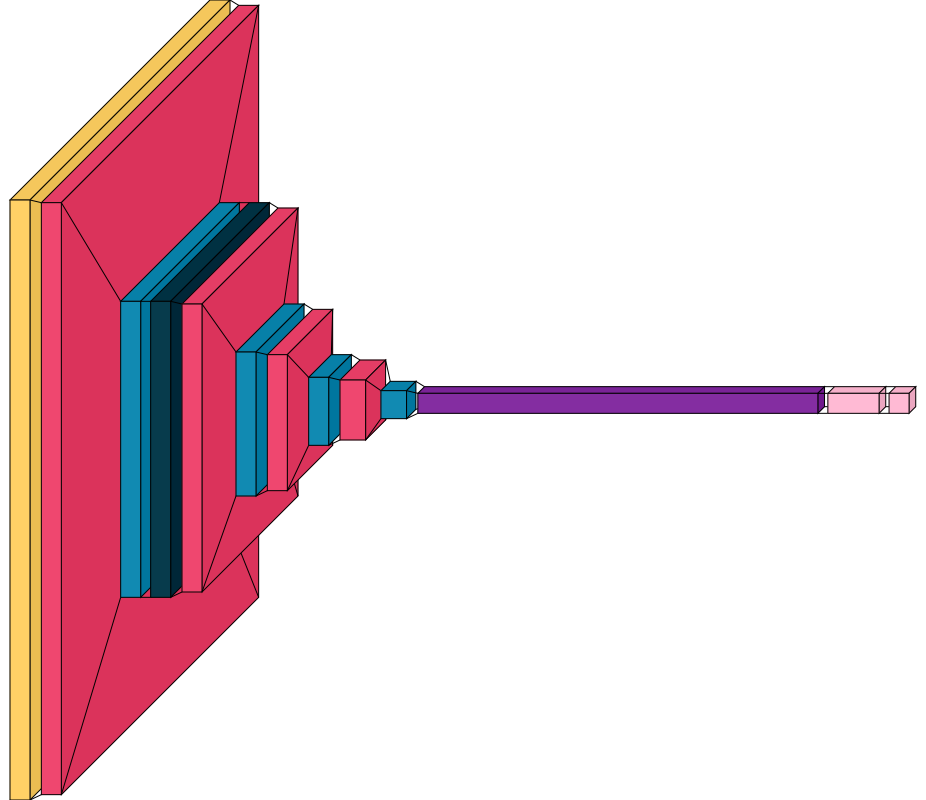

In [285]:
vk.layered_view(mod_func)

## <a id="class7b">b. *Model Training*</a>

In [286]:
randseed(412)

mod_func.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

histfunc = mod_func.fit(X_train, 
                    y_train,
                    epochs = 10,
                    verbose = 1,
                   callbacks=[callbacks], 
                   validation_data = (X_val, y_val))

Epoch 1/10


2024-07-16 16:39:18.418936: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


45/45 [==============================] - 3s 34ms/step - loss: 0.6444 - accuracy: 0.7159 - val_loss: 0.2639 - val_accuracy: 0.8956
Epoch 2/10
45/45 [==============================] - 1s 23ms/step - loss: 0.1631 - accuracy: 0.9353 - val_loss: 0.0913 - val_accuracy: 0.9634
Epoch 3/10
45/45 [==============================] - 1s 23ms/step - loss: 0.0916 - accuracy: 0.9662 - val_loss: 0.3004 - val_accuracy: 0.8903
Epoch 4/10
45/45 [==============================] - 1s 24ms/step - loss: 0.1316 - accuracy: 0.9606 - val_loss: 0.1361 - val_accuracy: 0.9478
Epoch 5/10
45/45 [==============================] - 1s 24ms/step - loss: 0.0341 - accuracy: 0.9909 - val_loss: 0.1016 - val_accuracy: 0.9739


## <a id="class7c"> c. *Model Evaluation*</a>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

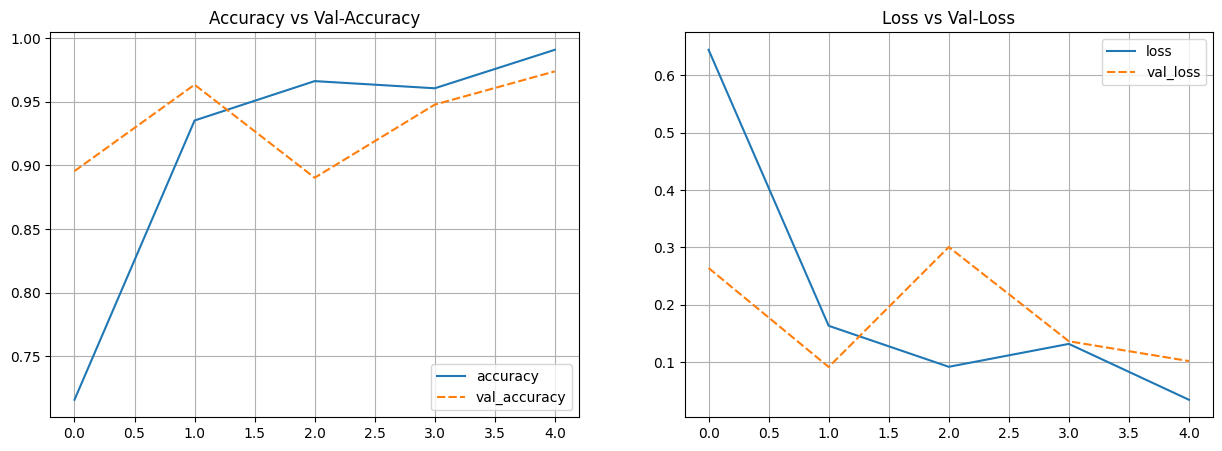

In [292]:
history_model_1 = pd.DataFrame(histfunc.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_model_1[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_model_1[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

**Explanation**

As we can see the model only performs one four epoch and then it got >= 99% accuracy. Not only in the training, the graph also shows that this indicates overfitting in the model, We can handle this by reducing the complexity of our model.

---

# <a id="class8">**8. Model Saving**</a> <a style="float:right; margin-right: 15px"><img src="https://cdn-icons-png.flaticon.com/512/1004/1004755.png" alt="drawing" width="64" align="center"/></a>


---

In [291]:
model.save_weights("/kaggle/working/mod_seq.h5")
mod_func.save_weights("/kaggle/working/mod_func.h5")

---

# <a id="class9">**9. Model Inference**</a> <a style="float:right; margin-right: 15px"><img src="https://cdn-icons-png.flaticon.com/512/10930/10930725.png" alt="drawing" width="64" align="center"/></a>

---

---

# <a id="class10">**10. Conclusion**</a> <a style="float:right; margin-right: 15px"><img src="https://cdn-icons-png.freepik.com/256/11063/11063232.png" alt="drawing" width="64" align="center"/></a>

---

**Conclusion**

Based from two of the model that we made:

*Sequential*
- The sequential model performs better with slight overfit as shown in the graph.
- The rapid decrease in both training and validation loss indicates effective learning initially. 
- Despite potential overfitting, the validation accuracy remains relatively high, which means the model performs well on unseen data, but there is room for improvement.

*Functional*
- The small gap between training and validation metrics suggests that the model generalizes well to unseen data. The validation accuracy remains high, and the validation loss stays low throughout the training.
- Despite some fluctuations in the validation metrics, the overall trend indicates stable learning without significant overfitting or underfitting.
- While training, the model shows high accuracy at the first epoch, this shows a possibility in overfitting.

*Recommendation*
- We can try to reduce the complexity of our model, especially at the one which using Functional API. We can decrease the chance of overfitting by doing so.
- Apply data augmentation to increase the diversity of the training set, which can help improve generalization.